### Decision Tree Regressor
Before learning causal forest, I need to learn decision tree regression.

[Text(167.4, 181.2, 'X[0] <= 3.133\nmse = 0.547\nsamples = 80\nvalue = 0.122'),
 Text(83.7, 108.72, 'X[0] <= 0.514\nmse = 0.231\nsamples = 51\nvalue = 0.571'),
 Text(41.85, 36.23999999999998, 'mse = 0.192\nsamples = 11\nvalue = 0.052'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.148\nsamples = 40\nvalue = 0.714'),
 Text(251.10000000000002, 108.72, 'X[0] <= 3.85\nmse = 0.124\nsamples = 29\nvalue = -0.667'),
 Text(209.25, 36.23999999999998, 'mse = 0.124\nsamples = 14\nvalue = -0.452'),
 Text(292.95, 36.23999999999998, 'mse = 0.041\nsamples = 15\nvalue = -0.869')]

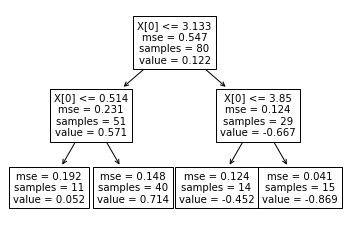

In [6]:
from sklearn import tree
tree.plot_tree(regr_1)

[Text(512.7567567567568, 597.96, 'X[0] <= 3.133\nmse = 0.547\nsamples = 80\nvalue = 0.122'),
 Text(188.51351351351352, 489.24, 'X[0] <= 0.514\nmse = 0.231\nsamples = 51\nvalue = 0.571'),
 Text(60.32432432432432, 380.52000000000004, 'X[0] <= 0.046\nmse = 0.192\nsamples = 11\nvalue = 0.052'),
 Text(30.16216216216216, 271.8, 'mse = 0.0\nsamples = 1\nvalue = -1.149'),
 Text(90.48648648648648, 271.8, 'X[0] <= 0.502\nmse = 0.052\nsamples = 10\nvalue = 0.173'),
 Text(60.32432432432432, 163.07999999999998, 'X[0] <= 0.258\nmse = 0.035\nsamples = 9\nvalue = 0.221'),
 Text(30.16216216216216, 54.360000000000014, 'mse = 0.012\nsamples = 5\nvalue = 0.079'),
 Text(90.48648648648648, 54.360000000000014, 'mse = 0.007\nsamples = 4\nvalue = 0.398'),
 Text(120.64864864864865, 163.07999999999998, 'mse = -0.0\nsamples = 1\nvalue = -0.263'),
 Text(316.7027027027027, 380.52000000000004, 'X[0] <= 2.029\nmse = 0.148\nsamples = 40\nvalue = 0.714'),
 Text(241.2972972972973, 271.8, 'X[0] <= 1.421\nmse = 0.093\nsam

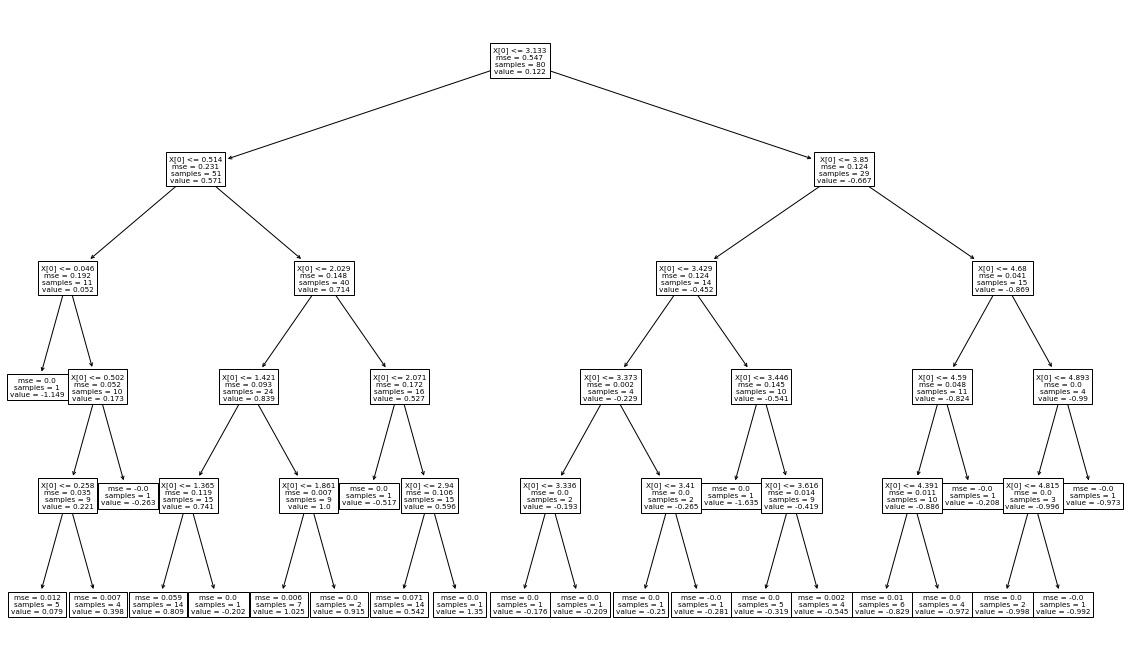

In [9]:
plt.figure(figsize=(20, 12))
tree.plot_tree(regr_2)

In [ ]:
class MyDecisionTreeRegressor(object):
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
        
    def _best_threshold(self, xj, ym):
        
        return s, mse
    
    def fit(self, X, y):
        J = range(X.shape[1])
        depth = 0
        tree = []  # (j, s)
        deque = [(X, y)]
        node_i = 0
        while depth < self.max_depth:
            # dequeの先頭から要素を取り出す。
            _Xm, _ym = deque.pop(0)
            # TODO: サンプル数が一定以下なら無視する。

            # ただし、treeの末尾に(None, None, yの平均)を追加する。
            # NOTE: 木の親子構造をindexのみで追えるようにするため
            
            # TODO: 分割後のサブセットのmseが最小になる変数xjを選択する。
            for j in J:
                # TODO: 変数xjを選んだ時の閾値とmseを返す関数を実装する。
                s, mse = self._best_threshold(_Xm[j], _ym)
            # TODO: 分割後のサブセットをdequeの末尾に追加する。
            # TODO: 選択した(j, s, yの平均)をtreeの末尾に追加する。
        self.tree = tree
        
    def predict(self, X):
        j = 0
        while True:
            j, s, mean_y = self.tree[j]
            if j is None:
                return mean_y
            if X[j] > s:
                j = 2 * j + 2
            else:
                j = 2 * j + 1   

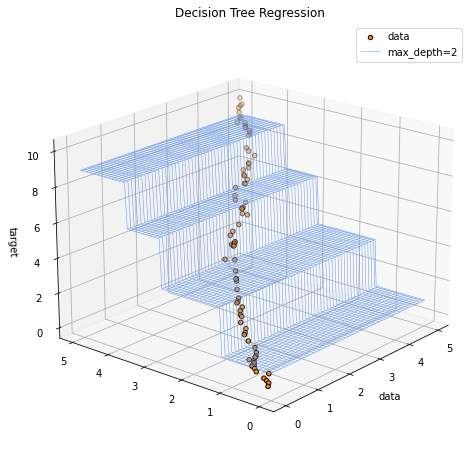

In [73]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 2), axis=0)
y = np.sum(np.abs(X), axis=1).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
xmesh, ymesh = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
mesh = np.c_[xmesh.ravel(), ymesh.ravel()]
y_1 = regr_1.predict(mesh).reshape(xmesh.shape)
y_2 = regr_2.predict(mesh).reshape(xmesh.shape)

# Plot the results
plt.figure(figsize=(12, 8))
ax = plt.subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, edgecolor="black",
            c="darkorange", label="data")
ax.plot_wireframe(xmesh, ymesh, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=0.5)
# plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
ax.set_xlabel("data")
ax.set_zlabel("target")
plt.title("Decision Tree Regression")
plt.legend()
ax.view_init(elev=20, azim=-140)
plt.show()